In [1]:
# Import des bibliothèques de base pour la manipulation des données et les visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import des bibliothèques de traitement de texte
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import re
import os

# Import des bibliothèques pour la modélisation et le traitement de texte avancé
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import sentence_transformers
from sentence_transformers import SentenceTransformer
import torch
import itertools
import gensim

# Import des bibliothèques pour le prétraitement et la modélisation des données
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import des bibliothèques pour la visualisation de modèles et l'affichage dans Jupyter Notebook
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from IPython.core.display import display, HTML

# Import des bibliothèques pour la sauvegarde et le chargement de modèles
import pickle
from gensim.models import FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Import des bibliothèques pour l'évaluation des modèles
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

# Import des bibliothèques pour le suivi des expériences de machine learning
import mlflow
import mlflow.sklearn
import mlflow.pytorch
import mlflow.tensorflow

# Import des bibliothèques pour le traitement du langage naturel avec Transformers
from transformers import BertTokenizer, BertModel

# Import des bibliothèques pour l'utilisation de TensorFlow et TensorFlow Hub
import tensorflow_hub as hub
import tensorflow as tf


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


C:\Users\ouedraogo080976\AppData\Local\Temp\ipykernel_21792\1184527746.py:39: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Téléchargement de la ressource nécessaire pour nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouedraogo080976\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('dataclean.csv')

In [4]:
data.head()

,Unnamed: 0,TitleBody,new_tags,TitleBody_bow,TitleBody_bow_lem,TitleBody_dl
0,0,How to convert Decimal to Double in C\n\nI wan...,['c#'],how convert decimal double want assign decimal...,how convert decimal double want assign decimal...,how to convert decimal to double in c i want t...
1,1,Calculate relative time in C\n\nGiven a specif...,['c#'],calculate relative time given specific datetim...,calculate relative time given specific datetim...,calculate relative time in c given a specific ...
2,2,Determine a user s timezone\n\nIs there a stan...,['html'],determine user timezone standard way web serve...,determine user timezone standard way web serve...,determine a user s timezone is there a standar...
3,4,How to use the C socket API in C on z OS\n\n...,"['c++', 'c']",how use socket api issues getting sockets api ...,how use socket api issue getting socket api wo...,how to use the c socket api in c on z os i m h...
4,6,Decoding T SQL CAST in C VB NET\n\nRecently o...,['c#'],decoding sql cast net recently site deluged re...,decoding sql cast net recently site deluged re...,decoding t sql cast in c vb net recently our s...


### Bag of Words

Le modèle Bag of Words apprend un vocabulaire à partir de tous les documents, puis modélise chaque document en comptant le nombre de fois où chaque mot apparaît, convertissant donc les données textuelles en données numériques.

Le modèle Bag of Words est une approche simple pour représenter des textes en tant que vecteurs numériques. 

Dans ce modèle, un texte est représenté par un vecteur où chaque dimension correspond à un mot unique du vocabulaire et la valeur de chaque dimension représente la fréquence d'apparition de ce mot dans le texte. 

Le modèle ignore la structure grammaticale et l'ordre des mots, se concentrant uniquement sur les mots eux-mêmes et leur fréquence.

Nous utilisons CountVectorizer pour transformer les textes en représentations vectorielles, puis comptons la fréquence des tokens.

In [19]:
# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Ajuster et transformer les données
X_bow = vectorizer.fit_transform(data['TitleBody_bow_lem'])

# Récupérer les mots du vocabulaire
vocab = vectorizer.get_feature_names_out()

# Compter la fréquence des tokens
token_counts = X_bow.toarray().sum(axis=0)
token_freq = dict(zip(vocab, token_counts))

# Trier les tokens par fréquence décroissante
sorted_token_freq = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)

# Afficher les 10 tokens lemmatisés les plus fréquents
print(sorted_token_freq[:10])

[('java', 31741), ('class', 27999), ('android', 27682), ('file', 26248), ('using', 26120), ('code', 22557), ('error', 21414), ('new', 20720), ('get', 20540), ('return', 19876)]


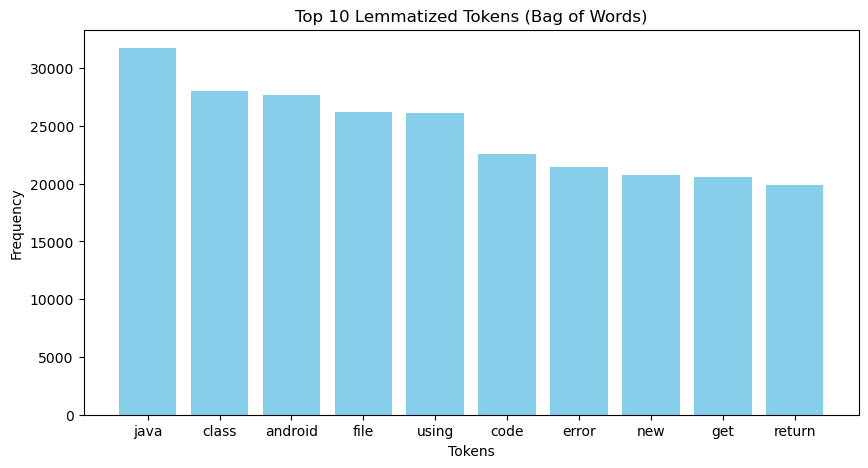

In [20]:
# Extraire les tokens et leurs fréquences
tokens, counts = zip(*sorted_token_freq[:10])

# Créer le graphique à barres
plt.figure(figsize=(10, 5))
plt.bar(tokens, counts, color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Lemmatized Tokens (Bag of Words)')
plt.show()

## APPROCHE NON SUPERVISEE: LDA (Latent Dirichlet Allocation)

### Contexte
Nous allons ici développer un algorithme de Machine Learning destiné à assigner automatiquement plusieurs tags pertinents à une question posée sur le célébre site Stack overflow.     
Ce programme s'adresse principalement aux nouveaux utilisateurs, afin de leur suggérer quelques tags relatifs à la question qu'ils souhaitent poser.

### Les données sources
Les données ont été cleanées dans le Notebook Exploration Dans ce nettoyage ont par exemple été appliquées les techniques de stop words, suppression de la ponctuation et des liens, tokenisation, lemmatisation ...

### Objectif de ce Notebook
Dans ce Notebook, nous allons traiter la partie **modélisation des données textuelles avec des modèles non supervisés**.   

### Modèle LDA
LDA, ou **Latent Derelicht Analysis** est un modèle probabiliste qui, pour obtenir des affectations de cluster, utilise deux valeurs de probabilité : $P(word | topics)$ et $P(topics | documents)$. Ces valeurs sont calculées sur la base d'une attribution aléatoire initiale, puis le calcul est répété pour chaque mot dans chaque document, pour décider de leur attribution de sujet. Dans cette méthode itérative, ces probabilités sont calculées plusieurs fois, jusqu'à la convergence de l'algorithme.

Nous allons entrainer 1 seul modèle basé sur la variable `TitleBody_bow_lem` en utilisant la librairie spécialisée **Gensim**. Pour cette partie, nous n'utiliserons pas le preprocessing TFIDF mais des fonctions propres aux méthodes Gensim.


#### Bag of Words

In [21]:
# Utiliser CountVectorizer pour transformer le texte en une matrice de termes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['TitleBody_bow_lem'])

# Appliquer LDA
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X)

# Afficher les topics et les mots les plus représentatifs
topics = []
for idx, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topics.append(topic_words)
    print(f"Topic {idx}: {', '.join(topic_words)}")

Topic 0: name, microsoft, using, var, xml, new, binding, value, string, system
Topic 1: shape, def, panda, dataframe, column, numpy, import, data, self, model
Topic 2: new, true, intent, activity, name, item, widget, app, view, android
Topic 3: post, api, get, error, return, url, response, user, self, request
Topic 4: script, site, using, lib, package, error, import, line, python, file
Topic 5: need, time, one, code, the, way, use, would, using, like
Topic 6: port, key, ssl, certificate, server, client, error, socket, connection, byte
Topic 7: color, export, using, module, test, const, component, import, react, image
Topic 8: file, require, path, new, std, loader, bar, webpack, foo, boost
Topic 9: list, private, get, return, object, new, name, string, class, public
Topic 10: add, command, import, 000, test, string, file, pdf, new, php
Topic 11: device, error, usr, find, new, test, unknown, source, class, java
Topic 12: boot, hibernate, com, bean, jar, apache, springframework, spring, o

In [22]:
# Fixer un mot représentatif par sujet
topic_keywords = [topic[0] for topic in topics]
print("Topic Keywords:", topic_keywords)

# Nouvelle question
new_question = ["How to start with neural networks in Python?"]

# Vectoriser la nouvelle question
X_new = vectorizer.transform(new_question)

# Transformer la nouvelle question dans l'espace des topics
topic_distribution = lda.transform(X_new)

# Obtenir le topic le plus dominant
dominant_topic = np.argmax(topic_distribution)

# Suggérer des tags basés sur le topic le plus dominant
suggested_tags = topics[dominant_topic]
print(f"Suggested Tags for the new question: {', '.join(suggested_tags)}")

Topic Keywords: ['name', 'shape', 'new', 'post', 'script', 'need', 'port', 'color', 'file', 'list', 'add', 'device', 'boot', 'var', 'artifactid', 'scala', 'include', 'support', 'data', 'err']
Suggested Tags for the new question: need, time, one, code, the, way, use, would, using, like


### mlflow

In [23]:
# Définir l'URI de suivi MLflow et le nom de l'expérience
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Définir l'URI de suivi MLflow
mlflow.set_experiment("Bag of Words NON_Supervised")  # Définir le nom de votre expérience MLflow

# Assurez-vous que les données data['TitleBody_Lem_Str'] sont définies avant cette section.

# Débuter une nouvelle session de suivi avec MLflow
with mlflow.start_run():
    # Utiliser CountVectorizer pour transformer le texte en une matrice de termes
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['TitleBody_bow_lem'])

    # Appliquer LDA
    lda = LatentDirichletAllocation(n_components=10, random_state=42)
    lda.fit(X)

    # Afficher les topics et les mots les plus représentatifs
    topics = []
    for idx, topic in enumerate(lda.components_):
        topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        topics.append(topic_words)
        print(f"Topic {idx}: {', '.join(topic_words)}")

    # Fixer un mot représentatif par sujet
    topic_keywords = [topic[0] for topic in topics]
    print("Topic Keywords:", topic_keywords)

    # Enregistrer les résultats des topics et mots les plus représentatifs dans MLflow
    for idx, topic_words in enumerate(topics):
        mlflow.log_param(f"topic_{idx}_words", ', '.join(topic_words))
    
    mlflow.log_param("topic_keywords", ', '.join(topic_keywords))

    # Nouvelle question
    new_question = ["How to start with neural networks in Python?"]

    # Vectoriser la nouvelle question
    X_new = vectorizer.transform(new_question)

    # Transformer la nouvelle question dans l'espace des topics
    topic_distribution = lda.transform(X_new)

    # Obtenir le topic le plus dominant
    dominant_topic = np.argmax(topic_distribution)

    # Suggérer des tags basés sur le topic le plus dominant
    suggested_tags = topics[dominant_topic]
    print(f"Suggested Tags for the new question: {', '.join(suggested_tags)}")

    # Enregistrer les résultats des suggestions dans MLflow
    mlflow.log_param("dominant_topic", dominant_topic)
    mlflow.log_param("suggested_tags", ', '.join(suggested_tags))

    # Enregistrer le modèle LDA et le vectorizer dans MLflow
    mlflow.sklearn.log_model(lda, "lda_model")
    mlflow.sklearn.log_model(vectorizer, "vectorizer")

# Pour visualiser les résultats, exécutez `mlflow ui` dans votre terminal et allez à l'adresse http://localhost:5000.

2024/07/23 13:15:55 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Topic 0: style, var, function, width, html, button, value, text, class, div
Topic 1: gradle, spring, dependency, version, apache, springframework, jar, com, org, java
Topic 2: item, name, string, true, activity, new, view, app, com, android
Topic 3: lib, error, url, line, response, return, file, request, user, self
Topic 4: code, script, import, get, data, using, function, python, error, file
Topic 5: need, time, one, code, the, way, use, would, using, like
Topic 6: xcode, version, project, usr, file, library, lib, app, build, error
Topic 7: code, app, new, using, component, module, test, import, react, image
Topic 8: foo, include, void, const, class, return, type, function, std, int


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\mlflow\models\model.py:321: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())
2024/07/23 13:19:49 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Topic 9: method, get, private, object, return, name, new, string, class, public
Topic Keywords: ['style', 'gradle', 'item', 'lib', 'code', 'need', 'xcode', 'code', 'foo', 'method']
Suggested Tags for the new question: need, time, one, code, the, way, use, would, using, like


C:\Users\ouedraogo080976\AppData\Local\anaconda\Lib\site-packages\mlflow\models\model.py:321: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.utc_time_created = str(utc_time_created or datetime.utcnow())
2024/07/23 13:19:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


#### Note:
On remarque ici que la modélisation non supervisée avec LDA n'est pas adaptée. En effet, le meilleur nombre de topics se situerait à partir de 10, mais l'algorithme ne parvient pas a établir de groupes bien distincts. Un certain nombre de topics sont très regroupés et donc représentés par les mêmes termes.